In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [2]:
# Reading the dataset
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# checking if there is any missing data
df.isnull().sum().sum()

0

In [5]:
def find_mean_std(df, attr):
    mean_attr = 0
    for attr_val in df[attr]:
        mean_attr = mean_attr + attr_val
    mean_attr = mean_attr/len(df[attr])
    
    std_attr  = 0
    for attr_val in df[attr]:
        std_attr = std_attr + (attr_val - mean_attr)**2
    std_attr = std_attr/len(df[attr])
    
    std_attr = sqrt(std_attr)
    return mean_attr, std_attr

In [6]:
def standardize_df(df, attr):
    df_new = df.copy()
    for v in attr:
        a_mean, a_std = find_mean_std(df_new, v)
        for i,entry in enumerate(df_new[v]):
            df_new.loc[i, v] = (entry - a_mean)/a_std
    return df_new

In [7]:
df_new = df.copy()

In [8]:
# Encoding Categorical Features
df_new['sex'].replace({"male": 0, "female" : 1}, inplace=True)
df_new['smoker'].replace({"no":0, "yes": 1}, inplace = True)

In [9]:
# Checking number of unique values the region column takes, so that I can add accordingly the one-hot encoding
df_new['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
df_new['region_1'] = 0
df_new['region_2'] = 0
df_new['region_3'] = 0
df_new['region_4'] = 0

In [11]:
for i in range(len(df_new)):
    if df_new.loc[i, 'region'] == 'southwest':
        df_new.loc[i, 'region_1'] = 1
    elif df_new.loc[i, 'region'] == 'southeast':
        df_new.loc[i, 'region_2'] = 1
    elif df_new.loc[i, 'region'] == 'northwest':
        df_new.loc[i, 'region_3'] = 1
    else:
        df_new.loc[i, 'region_4'] = 1

In [12]:
df_new = df_new.drop(columns='region')

In [13]:
df_new = standardize_df(df_new, ['age', 'bmi', 'children', 'charges', 'smoker', 'sex', 'region_1', 'region_2', 'region_3', 'region_4'])
df_new.head(3)

,age,sex,bmi,children,smoker,charges,region_1,region_2,region_3,region_4
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,0.298584,1.765481,-0.611324,-0.566418,-0.565267
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,-0.953689,-0.566418,1.635795,-0.566418,-0.565267
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,-0.728675,-0.566418,1.635795,-0.566418,-0.565267


In [14]:
for v in ['age', 'bmi', 'children', 'charges', 'smoker', 'sex', 'region_1', 'region_2', 'region_3', 'region_4']:
    print(find_mean_std(df_new, v))

(-1.541699835391286e-16, 1.0)
(1.518424980502844e-15, 1.0000000000000004)
(1.045501503010237e-17, 1.0000000000000016)
(-6.920224234210617e-17, 1.0000000000000004)
(-3.787038777570414e-16, 0.9999999999999856)
(2.4096320355093084e-16, 1.000000000000011)
(5.401757765552892e-17, 0.9999999999999859)
(5.72536537362749e-17, 0.9999999999999999)
(3.742231570298547e-16, 0.999999999999986)
(-1.5383807830007775e-16, 0.9999999999999858)


In [15]:
# putting the dependent variable at end
cols = df_new.columns.tolist()
cols

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'charges',
 'region_1',
 'region_2',
 'region_3',
 'region_4']

In [16]:
cols = cols[:5] + cols[6:] + cols[5:6]
cols

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region_1',
 'region_2',
 'region_3',
 'region_4',
 'charges']

In [17]:
df_new = df_new[cols]
df_new.head(2)

,age,sex,bmi,children,smoker,region_1,region_2,region_3,region_4,charges
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,1.765481,-0.611324,-0.566418,-0.565267,0.298584
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,-0.566418,1.635795,-0.566418,-0.565267,-0.953689


In [18]:
data = np.array(df_new.values)
data

array([[-1.43876426,  1.0105187 , -0.45332   , ..., -0.56641788,
        -0.56526686,  0.2985838 ],
       [-1.50996545, -0.98959079,  0.5096211 , ..., -0.56641788,
        -0.56526686, -0.95368917],
       [-0.79795355, -0.98959079,  0.38330685, ..., -0.56641788,
        -0.56526686, -0.72867467],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , ..., -0.56641788,
        -0.56526686, -0.96159623],
       [-1.29636188,  1.0105187 , -0.79781341, ..., -0.56641788,
        -0.56526686, -0.93036151],
       [ 1.55168573,  1.0105187 , -0.26138796, ...,  1.76548098,
        -0.56526686,  1.31105347]])

In [19]:
# Random Seed initialized, so that same shuffle on each run
np.random.seed(0)

In [20]:
# indices so that I can pick rows accordingly in a shuffled way
indices = [i for i in range(data.shape[0])]

In [21]:
np.random.shuffle(indices)

In [22]:
# choosing the first 80% indices in training data
train_data = data[indices[:(data.shape[0] * 80)//100]]
test_data  = data[indices[(data.shape[0] * 80)//100:]]

In [23]:
# Separating Dependent and Independent Variables
X_train = train_data[:, :-1]
Y_train = train_data[:, -1]

X_test = test_data[:, :-1]
Y_test = test_data[:, -1]

### Dividing Test Data into K-Parts

In [24]:
num = X_train.shape[0]//10

In [25]:
num

107

In [26]:
train_data_kx = []
train_data_ky = []
i = 0
while i < (len(X_train)):
    if(i+num<X_train.shape[0]):
        temp_x = X_train[i:i+num]
        temp_y = Y_train[i:i+num]
        i = i+num
    else:
        temp_x = X_train[i:]
        temp_y = Y_train[i:]
        i = X_train.shape[0]
        
    train_data_kx.append(temp_x)
    train_data_ky.append(temp_y)

## Part 3: 

In [27]:
def ridgereg(X, Y, lam, eta = 0.0001):
    """
    eta is learning rate, choosing less eta here helps avoid missing optima
    """
    m = X.shape[1] #number of columns in X (number of features)
    n = X.shape[0] #number of rows in X (number of data points)
    X_new = np.zeros((n, m))
    X_new[:, 0:m] = X # Converting data to numpy array format
    Y_new = np.ndarray((n, 1))
    for i in range(n):
        Y_new[i][0] = Y[i]
    W = np.zeros((m, 1)) 
    grad_w = -2*(X_new.T) @ (Y_new - X_new@W) + 2*lam*W
    W_new = W - eta * grad_w
    mrss_lam = lambda w:((Y_new - (X_new @ w)).T)@(Y_new - (X_new @ w)) + lam * ((w.T)@w)
    i = 0
    while i<200:
        W = W_new
        grad_w = -2*(X_new.T) @ (Y_new - X_new@W) + 2*lam*W
        W_new = W - eta * grad_w
        i = i+1
        if abs(mrss_lam(W_new))>abs(mrss_lam(W)):
            break
    return W

In [28]:
def predridgereg(x, weights):
    return np.dot(x, weights)

## Part 4:
- Plotting Mean Square error for different lambda values

In [29]:
def find_mse(y_predict, y_actual):
    n = len(y_predict)
    mse = 0
    for i in range(n):
        mse = mse + (y_predict[i] - y_actual[i])**2
    mse = mse/n
    return mse

In [30]:
def kfold_mse_w(train_data_kx, train_data_ky, lam):
    mse_list = []
    w_list = []
    w_grand = None
    flag = 0
    for i in range(len(train_data_kx)):
        validation_x = train_data_kx[i]
        validation_y = train_data_ky[i]
        concatx_list = []
        concaty_list = []
        for j in range(len(train_data_kx)):
            if(j!=i):
                concatx_list.append(train_data_kx[j])
                concaty_list.append(train_data_ky[j])
        train_x = np.concatenate(concatx_list)
        train_y = np.concatenate(concaty_list)
        w_pred = ridgereg(train_x, train_y, lam)
        y_pred = []
        for j in range(len(validation_x)):
            y_pred.append(predridgereg(validation_x[j], w_pred))
        mse = find_mse(y_pred, validation_y)
        mse_list.append(mse)
        w_list.append(w_pred)
        if not flag:
            w_grand = np.array(w_pred)
            flag = 1
        else:
            w_grand = w_grand + np.array(w_pred)
    return np.sum(mse_list)/len(mse_list), (w_grand)/len(w_list), w_list

In [31]:
kfold_mse_w(train_data_kx, train_data_ky, 0.08)[:2]

(0.2401661740437288,
 array([[ 0.30293842],
        [ 0.00184324],
        [ 0.15722721],
        [ 0.04920523],
        [ 0.80199799],
        [-0.01405146],
        [-0.01516856],
        [ 0.0078646 ],
        [ 0.02195069]]))

In [32]:
power_list = np.arange(-10, 10)

In [33]:
from math import pow

In [34]:
lam_list = [i*pow(10,j) for j in power_list for i in range(1, 10)]

In [35]:
mse_list = [kfold_mse_w(train_data_kx, train_data_ky, lamb)[0] for lamb in lam_list]

In [36]:
lam_log_list = [np.log10(lamb) for lamb in lam_list]

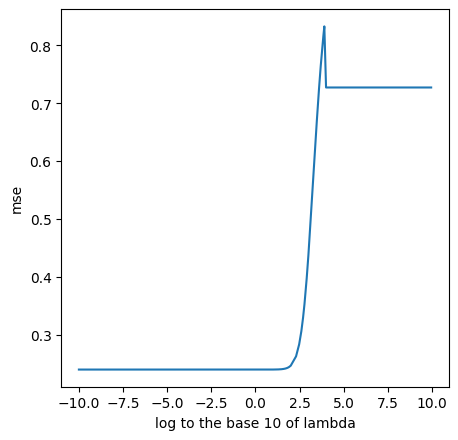

In [37]:
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.xlabel("log to the base 10 of lambda")
plt.ylabel("mse")
plt.plot(lam_log_list, mse_list)
plt.show()

## I would choose any lambda  between  10^(-2) to 10^(1)

## Part 5

In [38]:
lam_list[70:80]

[0.008, 0.009000000000000001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]

In [39]:
testing_error = []
training_error = []
variances = []
for lambda_value in lam_list:
    train_error, model, model_list = kfold_mse_w(train_data_kx, train_data_ky, lambda_value)
    y_pred = []
    for i in range(len(X_test)):
        y_pred.append(predridgereg(X_test[i], model))
    temp_variance = 0
    for i in range(len(model_list)):
        y_pred_model = []
        for j in range(len(X_test)):
            y_pred_model.append(predridgereg(X_test[j], model_list[i]))
        temp_variance = temp_variance + np.sum((np.square(np.array(y_pred_model) - np.array(y_pred))))
    temp_variance = temp_variance/len(model_list)/len(X_test)
    variances.append(temp_variance)
    testing_error.append(find_mse(y_pred, Y_test))
    training_error.append(train_error)

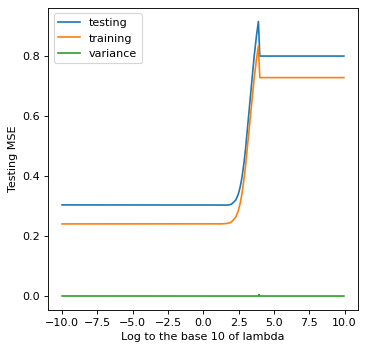

In [40]:
fig = plt.figure(figsize=(5, 5), dpi = 80)
plt.plot(lam_log_list, testing_error, label ='testing')
plt.plot(lam_log_list, training_error, label = 'training')
plt.plot(lam_log_list, variances, label = 'variance')
plt.legend()
plt.xlabel("Log to the base 10 of lambda")
plt.ylabel("Testing MSE")
plt.show()

In [41]:
max(variances)

0.0050513360817154304

## Testing error is as expeceted higher than training error
## Variance is almost zero here